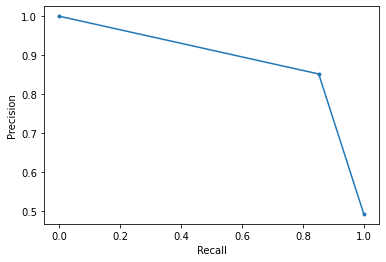

(array([0.85601578, 0.85192698]), array([0.85601578, 0.85192698]))
[0.85601578 0.85192698]


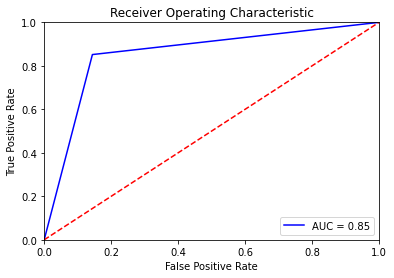

0.8539713783901643


In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_curve

df = pd.read_csv("mock_prediction.csv")
pre_list = list(df['pre'])
y_list = list(df['y'])

def precision_recall_score(pre_list, y_list):
    lr_precision, lr_recall, _ = precision_recall_curve(pre_list, y_list)
    plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
    return precision_recall_fscore_support(pre_list, y_list)[0], precision_recall_fscore_support(pre_list, y_list)[1]    

def f_score(pre_list, y_list):
    return precision_recall_fscore_support(pre_list, y_list)[2]

def auc_score(pre_list, y_list):
    fpr, tpr, threshold = metrics.roc_curve(pre_list, y_list)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return roc_auc

print(precision_recall_score(pre_list, y_list))
print(f_score(pre_list, y_list))
print(auc_score(pre_list, y_list))